Install gensim

In [1]:
pip install gensim

In [2]:
from gensim.models import Word2Vec

In [3]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fascinating field."
]

In [4]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [6]:
final_data  #list of list

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [7]:
model = Word2Vec(final_data, min_count=1, vector_size=10)
model

In [8]:
model.wv['apples']  #word vector of apples

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [9]:
model.wv['bananas']

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [91]:
model.wv['cherry']  #it's not in list so it will give error

KeyError: "Key 'cherry' not present"

In [11]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [12]:
def get_embedding(word):       #to get the words which are not in list
    try:
        word_embedding = model.wv[word]
        print('Word Embedding for', word,'is:', word_embedding)
    except:
        print(word, 'is not in vovabulary')

In [13]:
get_embedding('cherry')

cherry is not in vovabulary


In [14]:
get_embedding('language')

Word Embedding for language is: [-0.09370242  0.03826698  0.04880315 -0.06427562  0.0120678  -0.0207452
  0.00025877 -0.09880827  0.02689312 -0.04751511]


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
cosine_similarity(model.wv['apples'].reshape(1,-1),
                  model.wv['bananas'].reshape(1,-1))

array([[0.18977958]], dtype=float32)

In [17]:
cosine_similarity(model.wv['dog'].reshape(1,-1),
                  model.wv['fox'].reshape(1,-1))

array([[0.2238495]], dtype=float32)

In [18]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [19]:
from nltk.corpus import abc

In [20]:
sents = abc.sents()   #abc is random dataset

In [21]:
len(sents)

29059

In [22]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [23]:
model = Word2Vec(sents, min_count=1, vector_size=10)
model

In [24]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [25]:
len(model.wv.key_to_index)   #unique words

31885

which words are very close in the vector space (most similar)

In [26]:
model.wv.most_similar('company') #score is also given with words

[('inquiry', 0.9596786499023438),
 ('group', 0.9505485892295837),
 ('report', 0.9500167369842529),
 ('government', 0.9500088691711426),
 ('Dept', 0.9488164782524109),
 ('Government', 0.9482640624046326),
 ('slabs', 0.9461545944213867),
 ('disband', 0.9387754797935486),
 ('research', 0.9364905953407288),
 ('Court', 0.9357829093933105)]

In [27]:
model.wv.most_similar('government')

[('research', 0.969826340675354),
 ('investigated', 0.9639440774917603),
 ('Anticipation', 0.9572874307632446),
 ('calling', 0.9514123797416687),
 ('company', 0.9500088095664978),
 ('epic', 0.9463686943054199),
 ('Court', 0.940468966960907),
 ('findings', 0.9399477243423462),
 ('group', 0.9397211074829102),
 ('new', 0.9387761950492859)]

In [28]:
model.wv['government']   #vector of government

array([-0.3713038 ,  0.85570085,  3.1645787 , -0.4152423 , -0.3092171 ,
       -1.3617007 ,  0.1906185 ,  0.16785593, -1.6734413 , -0.8939807 ],
      dtype=float32)

In [29]:
model.wv['company']

array([-0.41259018,  1.47604   ,  4.728761  , -1.9191695 , -0.0612209 ,
       -1.599135  ,  0.9503065 , -0.9523138 , -2.9817126 , -1.2327567 ],
      dtype=float32)

In [30]:
cosine_similarity(model.wv['government'].reshape(1,-1),
                  model.wv['company'].reshape(1,-1))[0]

array([0.95000887], dtype=float32)

**Read the data and train the Word2Vec**

In [31]:
# data - intents.json

In [32]:
import json

In [33]:
with open('intents.json') as f:
    data = json.load(f)

In [34]:
type(data)

list

In [35]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [36]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [37]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [38]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [39]:
import pandas as pd

In [40]:
df= pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [41]:
df['patterns']

,patterns
0,"[Hi, How are you, Is any one to talk?, Hello, ..."
1,"[Bye, See you later, Goodbye, I will come back..."
2,"[Thanks for helping me, Thank your guidance, T..."
3,"[What hours are you open?, Tell your opening t..."
4,"[Can I pay using credit card?, Can I pay usin..."


In [42]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [43]:
df['patterns'].apply(' '.join)

,patterns
0,Hi How are you Is any one to talk? Hello hi ar...
1,Bye See you later Goodbye I will come back soon
2,Thanks for helping me Thank your guidance That...
3,What hours are you open? Tell your opening tim...
4,Can I pay using credit card? Can I pay using ...


In [44]:
df['patterns'] = df['patterns'].apply(' '.join)

In [45]:
df

,tag,patterns,responses
0,welcome,Hi How are you Is any one to talk? Hello hi ar...,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,Bye See you later Goodbye I will come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,Thanks for helping me Thank your guidance That...,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,What hours are you open? Tell your opening tim...,"[We're open every day 8am-7pm, Our office hour..."
4,payments,Can I pay using credit card? Can I pay using ...,"[We accept VISA, Mastercard and credit card, W..."


In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
import string
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x.lower() for x in word_tokenize(x)))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if x not in stop))
df['patterns'] = df['patterns'].apply(lambda x:' '.join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))

In [48]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [49]:
bigger_list = []
for i in df['patterns']:
    words = word_tokenize(i)
    bigger_list.append(words)

In [50]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [51]:
model= Word2Vec(bigger_list, min_count=1, vector_size=2)

In [52]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [53]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [55]:
model.wv.key_to_index  #unique words

{'pay': 0,
 'open': 1,
 'use': 2,
 'hi': 3,
 'time': 4,
 'thank': 5,
 'hello': 6,
 'talk': 7,
 'soon': 8,
 'one': 9,
 'bye': 10,
 'see': 11,
 'later': 12,
 'goodbye': 13,
 'come': 14,
 'back': 15,
 'available': 16,
 'cash': 17,
 'help': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hours': 23,
 'tell': 24,
 'please': 25,
 'credit': 26,
 'card': 27,
 'guidance': 28}

Scatter Plot

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
words = list(model.wv.key_to_index.keys())
words

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [61]:
vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))

In [63]:
vectors  #this belongs to individual words

[[-0.026513906, 0.01156701],
 [0.25526112, 0.45090607],
 [-0.46515337, -0.35582092],
 [0.32294363, 0.4486494],
 [-0.2507714, -0.18816859],
 [0.36877084, -0.07690762],
 [-0.22683066, 0.32770258],
 [-0.24300802, -0.09080088],
 [0.14380899, 0.049651854],
 [-0.41426075, -0.4724409],
 [0.36533156, 0.25365862],
 [0.3375778, 0.038443603],
 [0.31745085, -0.17025824],
 [-0.047435395, 0.28846955],
 [-0.37631938, -0.19679889],
 [-0.37573153, -0.046566635],
 [0.47690594, -0.36595833],
 [-0.11668843, -0.09688705],
 [0.40388986, -0.29662946],
 [0.0021348884, -0.23767537],
 [-0.48039246, 0.25032294],
 [-0.43807694, -0.21959437],
 [-0.0018065537, -0.014891196],
 [-0.38314208, 0.48097077],
 [0.24910289, 0.46165717],
 [-0.40802845, 0.22491622],
 [-0.20685782, 0.041312076],
 [0.4248581, -0.22306798],
 [0.22575632, -0.33917618]]

In [68]:
vf = pd.DataFrame(vectors, columns=['x','y'])
vf

,x,y
0,-0.026514,0.011567
1,0.255261,0.450906
2,-0.465153,-0.355821
3,0.322944,0.448649
4,-0.250771,-0.188169
5,0.368771,-0.076908
6,-0.226831,0.327703
7,-0.243008,-0.090801
8,0.143809,0.049652
9,-0.414261,-0.472441


plot the graph

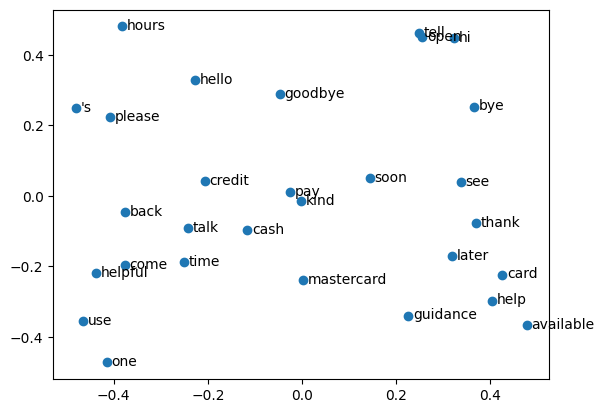

In [71]:
plt.scatter(vf['x'], vf['y'])

for i in range(len(words)):
    plt.annotate(xy=(vf.loc[i,'x']+0.01, vf.loc[i,'y']-0.01), text=words[i])

In [76]:
cosine_similarity(model.wv['cash'].reshape(1,-1),
                  model.wv['credit'].reshape(1,-1))

array([[0.62935936]], dtype=float32)

In [78]:
cosine_similarity(model.wv['cash'].reshape(1,-1),
                  model.wv['goodbye'].reshape(1,-1))    #distance=large

array([[-0.50550663]], dtype=float32)

In [79]:
model.wv.most_similar('help')

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135),
 ('see', 0.7338290810585022),
 ('mastercard', 0.5991546511650085),
 ('soon', 0.5686679482460022),
 ('kind', 0.4905630648136139),
 ('bye', 0.32444697618484497)]

In [80]:
model.wv.most_similar('help', topn=5)

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135)]

In [82]:
model.wv.doesnt_match(['use', 'one', 'come', 'hello', 'helpful'])

'hello'

In [90]:
model.wv.doesnt_match(['pay', 'kind', 'cash', 'mastercard', 'guidance', 'bye'])

'bye'